# Data Analysis and Data Science
## Be curious about the method 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 4th, 2023

<hr style="border:1px solid black"> </hr>

In [ ]:
### Student Name: Ayman Shoukari

Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 5th, noon to hand-in your Notebook.

In [6]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Genes correlation [25 pts]

In [8]:
### Import and clean the Gene expression cancer 1 dataset
data = pd.read_csv("gene_expression_cancer_1.csv", sep=",", header=0)
data.head()

,ESR1,PGR,BCL2,NAT1,Results
0,5.1,3.5,1.4,0.2,Cured
1,4.9,3.0,1.4,0.2,Cured
2,4.7,3.2,1.3,0.2,Cured
3,4.6,3.1,1.5,0.2,Cured
4,5.0,3.6,1.4,0.2,Cured


### Global correlation [6 pts]

In [9]:
### Consider the PGR and ESR1 genes. Do the expression of these two genes correlates?
### Consider the entire dataset.
### Answer the question with a Pearson correlation coefficient, a plot and brief interpretation of your results.

reg = sp.stats.linregress(x=data.PGR,y=data.ESR1, alternative="two-sided")
reg.rvalue

print("Pearson correlation",reg.rvalue)



Pearson correlation -0.10936924995064938


ESR1 and PGR are not linerally corroleated since r coffcient is -0.10


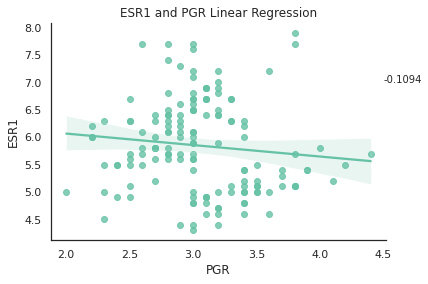

In [10]:
L = sns.regplot(data,x="PGR",y="ESR1")
L.text(4.5,7.0,np.round(reg.rvalue,4))
L.set_title("ESR1 and PGR Linear Regression")


sns.despine()
print("ESR1 and PGR are not linerally correlated since r coffcient is -0.10")

### Grouped correlations [14 pts]

Axes(0.125,0.125;0.775x0.755)
R Value= 0.7467803732639268


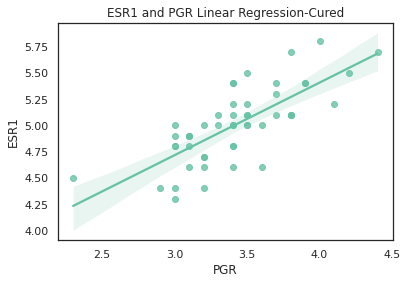

In [11]:
### Consider the same two genes, but assess correlation based on the patient outcomes (a.k.a "Results").
### For each group, return a Pearson correlation coefficient and a plot.
### (You can generate a single plot with all three groups or three individual plots)
### Briefly interpret your results and state if your conclusion differ from the one previously made (Global correlation).

#create dataframe using patients rows, the genes of interests ESR and PGR and Results
o=data.loc[:,["ESR1","PGR","Results"]]

#filter based on results
datasubset_Results1 = o.loc[o["Results"] == "Cured"]

o1= sp.stats.linregress(x=datasubset_Results1.PGR, y=datasubset_Results1.ESR1 ,alternative="two-sided")
o1.rvalue
o12= sns.regplot(datasubset_Results1, x="PGR",y="ESR1")
o12.set_title("ESR1 and PGR Linear Regression-Cured")
print(o12)
print("R Value=",o1.rvalue)
#print(datasubset_Results1)



Axes(0.125,0.125;0.775x0.755)
R Value= 0.5280216842864213


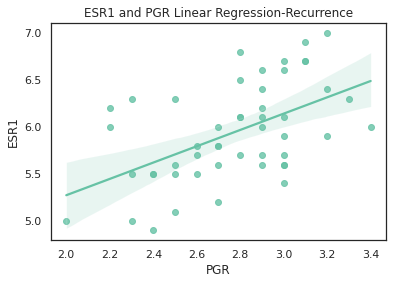

In [12]:


datasubset_Results2= o.loc[o["Results"] == "Recurrence"]
o2= sp.stats.linregress(x=datasubset_Results2.PGR, y=datasubset_Results2.ESR1 ,alternative="two-sided")
o2.rvalue
o13= sns.regplot(datasubset_Results2, x="PGR",y="ESR1")
o13.set_title("ESR1 and PGR Linear Regression-Recurrence")
print(o13)
print("R Value=",o2.rvalue)
#print(datasubset_Results2)

Axes(0.125,0.125;0.775x0.755)
R Value= 0.46200631074260196


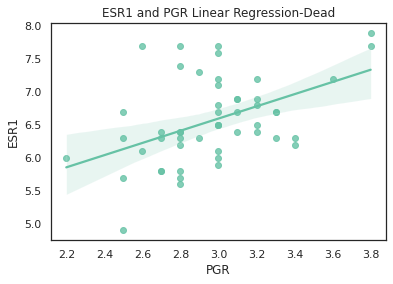

In [13]:
datasubset_Results3= o.loc[o["Results"] == "Dead"]
o3= sp.stats.linregress(x=datasubset_Results3.PGR, y=datasubset_Results3.ESR1 ,alternative="two-sided")
o3.rvalue
o14= sns.regplot(datasubset_Results3, x="PGR",y="ESR1")
o14.set_title("ESR1 and PGR Linear Regression-Dead")
print(o14)
print("R Value=",o3.rvalue)
#print(datasubset_Results3)

In [33]:
print("ESR 1 and PGR show a correlation based on the outcome, where the highest r value was in the cured patients")
print("This emplies that ESR 1 and PGR expression show a correlation based on outcome")

ESR 1 and PGR show a corroletion based on the outcome, where the highest r value was in the cured patients
This emplies that ESR 1 and PGR expression show a correlation based on outcome


### Spearman's rank correlation [5 pts]

In [32]:
### Calculate the Spearman' rank correlations for the four comparisons made previously.
### (Global dataset and the three goups)
### Do the results differ? if so, do the conlusions also differ? 
### Briefly explain what are the new conclusions.
speaR0 = sp.stats.spearmanr(data.PGR,data.ESR1)
speaR1 = sp.stats.spearmanr(datasubset_Results1.PGR,datasubset_Results1.ESR1)
speaR2 = sp.stats.spearmanr(datasubset_Results2.PGR,datasubset_Results2.ESR1)
speaR3 = sp.stats.spearmanr(datasubset_Results3.PGR,datasubset_Results3.ESR1)

print("spearR0=",speaR0)
print("spearR1=",speaR1)
print("spearR2=",speaR2)
print("spearR3=",speaR3)

spearR0= SignificanceResult(statistic=np.float64(-0.15945651848582867), pvalue=np.float64(0.05128491483834292))
spearR1= SignificanceResult(statistic=np.float64(0.7686085073729368), pvalue=np.float64(7.161781507883594e-11))
spearR2= SignificanceResult(statistic=np.float64(0.5180736821877614), pvalue=np.float64(0.00013742136038254855))
spearR3= SignificanceResult(statistic=np.float64(0.4389928351262457), pvalue=np.float64(0.0012702598513604905))


In [36]:
print("ESR1 and PGR are not globally correlated")
print("ESR 1 and PGR show a strong positive correlation based on the cured outcome, where the highest r value was in the cured patients")
print("ESR 1 and PGR show a positive moderate correlation  based on the recurrence outcome")
print("ESR 1 and PGR show a poistive moderate correlation based on the dead outcome")
print("Conclusion:This suggest that the correlation of ESR 1 and PGR in cured patient is different, although that the two genes are not correlated globally but they are correlated in a specific outcome")

ESR1 and PGR are not globally corroleated
ESR 1 and PGR show a strong positive correlation based on the cured outcome, where the highest r value was in the cured patients
ESR 1 and PGR show a positive moderate correlation  based on the recurrence outcome
ESR 1 and PGR show a poistive moderate correlation based on the dead outcome
Conclusion:This suggest that the correlation of ESR 1 and PGR in cured patient is different, although that the two genes are not correlated globally but they are correlated in a specific outcome


In [37]:
print("Conclusion did not differ from previous one")

Conclusion did not differ from previous one
